In [94]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline
from pandas_datareader import data, wb
import warnings
warnings.filterwarnings('ignore')

In [116]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [24]:
# Setting the start dat to January 1, 2008
# Setting the end date to January 1 2018
start = datetime.datetime(2008,1,1)
end = datetime.datetime(2018,1,1)

In [42]:
# Importing the stock data from Yahoo Finance 
# For the following Companies

# Apple
AAPL = data.DataReader("AAPL",'yahoo',start,end)

# Google or Alphabet Inc.
GOOGL = data.DataReader("GOOGL",'yahoo',start,end)

# Microsoft
MSFT = data.DataReader("MSFT",'yahoo',start,end)

# Amazon
AMZN = data.DataReader("AMZN",'yahoo',start,end)

In [43]:
# Creating a list of ticker symbols in alphabetical order.
tickers = ['AAPL','AMZN','GOOGL','MSFT']

In [44]:
# Concatanating the dataframes in a single dataframe.
stocks = pd.concat([AAPL, AMZN, GOOGL, MSFT], axis = 1, keys = tickers)

In [47]:
# Setting the column names
stocks.columns.names = ['Stock Ticker','Stock Info']

In [50]:
stocks.head()

Stock Ticker       AAPL                                                \
Stock Info         High        Low       Open      Close       Volume   
Date                                                                    
2008-01-02    28.608572  27.507143  28.467142  27.834286  269794700.0   
2008-01-03    28.198572  27.527143  27.915714  27.847143  210516600.0   
2008-01-04    27.571428  25.555714  27.350000  25.721428  363958000.0   
2008-01-07    26.228571  24.318571  25.892857  25.377142  518048300.0   
2008-01-08    26.065714  24.400000  25.734285  24.464285  380954000.0   

Stock Ticker                  AMZN                                   \
Stock Info    Adj Close       High        Low       Open      Close   
Date                                                                  
2008-01-02    18.639585  97.430000  94.699997  95.349998  96.250000   
2008-01-03    18.648197  97.250000  94.519997  96.059998  95.209999   
2008-01-04    17.224680  93.400002  88.500000  93.260002  88.790001   
2008-01-07    16.994129  90.570000  85.470001  88.620003  88.820000   
2008-01-08    16.382820  91.830002  86.930000  87.550003  87.879997   

Stock Ticker    ...           GOOGL                                      \
Stock Info      ...            Open       Close      Volume   Adj Close   
Date            ...                                                       
2008-01-02      ...      346.781769  342.937927   8605100.0  342.937927   
2008-01-03      ...      342.972961  343.007996   6498400.0  343.007996   
2008-01-04      ...      340.185181  328.828827  10708800.0  328.828827   
2008-01-07      ...      327.297302  324.949951  12793900.0  324.949951   
2008-01-08      ...      326.826813  316.156158  10667500.0  316.156158   

Stock Ticker       MSFT                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2008-01-02    35.959999  35.000000  35.790001  35.220001  63004200.0   
2008-01-03    35.650002  34.860001  35.220001  35.369999  49599600.0   
2008-01-04    35.200001  34.090000  35.189999  34.380001  72090800.0   
2008-01-07    34.799999  34.250000  34.549999  34.610001  80164300.0   
2008-01-08    34.709999  33.400002  34.709999  33.450001  79148300.0   

Stock Ticker             
Stock Info    Adj Close  
Date                     
2008-01-02    27.105476  
2008-01-03    27.220922  
2008-01-04    26.459013  
2008-01-07    26.636023  
2008-01-08    25.743277  

[5 rows x 24 columns]

In [51]:
# Getting the max Close price for each companies
stocks.xs(key = 'Close',axis = 1, level = 'Stock Info').max()

Stock Ticker
AAPL      176.419998
AMZN     1195.829956
GOOGL    1085.089966
MSFT       86.849998
dtype: float64

In [59]:
# Getting the returns for each company's stock
returns = pd.DataFrame()
for i in tickers:
    returns[i + ' Returns'] = stocks[i]['Close'].pct_change()

In [60]:
returns.head()

AAPL Returns  AMZN Returns  GOOGL Returns  MSFT Returns
Date                                                               
2008-01-02           NaN           NaN            NaN           NaN
2008-01-03      0.000462     -0.010805       0.000204      0.004259
2008-01-04     -0.076335     -0.067430      -0.041338     -0.027990
2008-01-07     -0.013385      0.000338      -0.011796      0.006690
2008-01-08     -0.035972     -0.010583      -0.027062     -0.033516

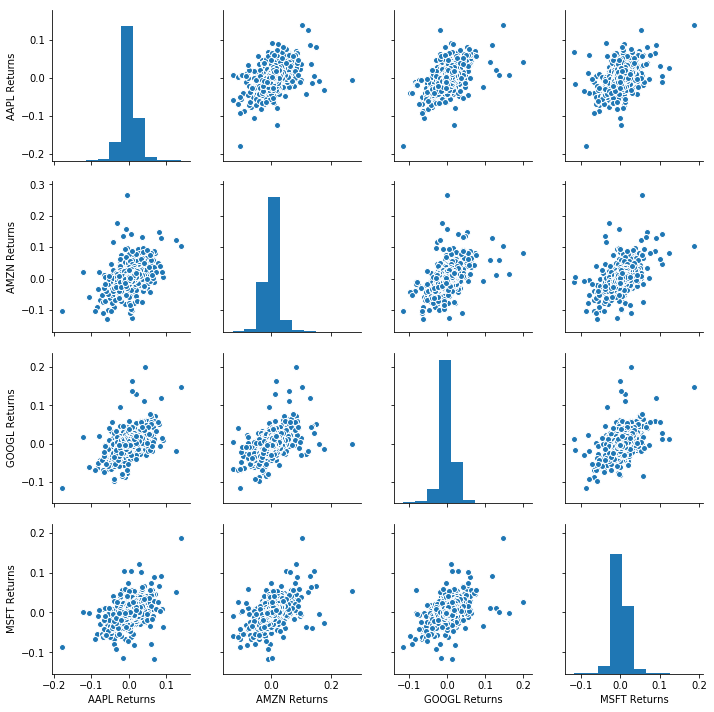

In [66]:
# Plotting the pairplot of the returns DataFrame
# The the first value is NaN, plotting the data from the 2nd index.
sns.pairplot(returns[1:])

In [70]:
# Finding when each company had the worst single day return
returns.idxmin()

AAPL Returns    2008-09-29
AMZN Returns    2008-10-15
GOOGL Returns   2008-09-29
MSFT Returns    2009-01-22
dtype: datetime64[ns]

In [74]:
# Finding when each company had the biggest single day gain
returns.idxmax()

AAPL Returns    2008-10-13
AMZN Returns    2009-10-23
GOOGL Returns   2008-04-18
MSFT Returns    2008-10-13
dtype: datetime64[ns]

In [82]:
# 2008 and 2009 are the years where the companies had their highest and lowest returns in single days

In [76]:
# Calculating the standard deviation of the stocks over the course of 10 years
returns.std()

AAPL Returns     0.019633
AMZN Returns     0.024294
GOOGL Returns    0.018444
MSFT Returns     0.017524
dtype: float64

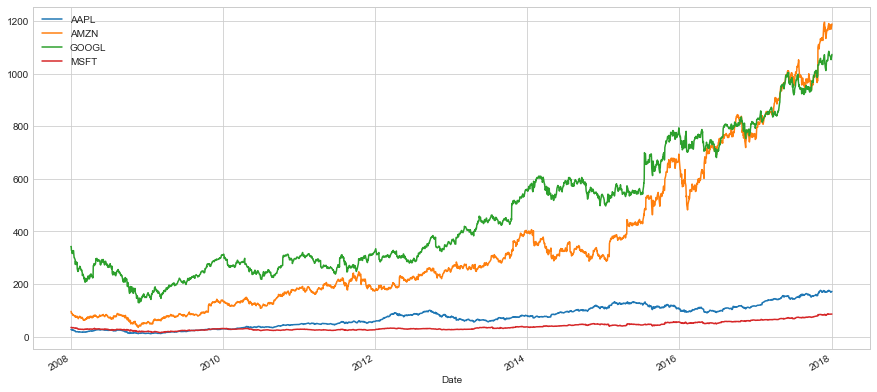

In [166]:
# Creating a line plot to show the changes in stock price over time 
for x in tickers:
    stocks[x]['Close'].plot(label = x, figsize = (15,7))
    plt.legend()

In [143]:
# Comparison of stocks over the period using plotly.
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

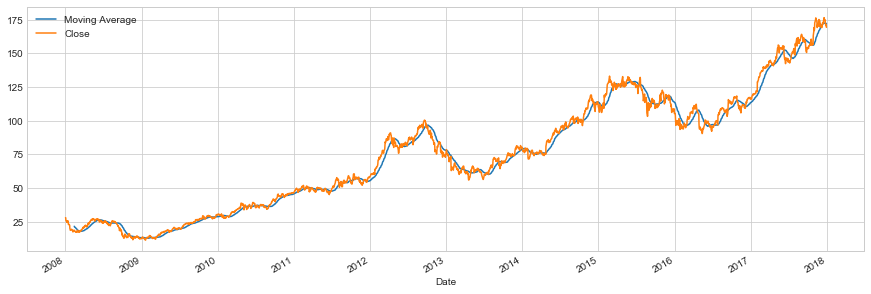

In [146]:
# 10 year moving average against the actual closing price
plt.figure(figsize=(15,5))
AAPL['Close'].ix['2008-01-01':'2018-01-01'].rolling(window=30).mean().plot(label = 'Moving Average')
AAPL['Close'].ix['2008-01-01':'2018-01-01'].plot(label='Close')
plt.legend()

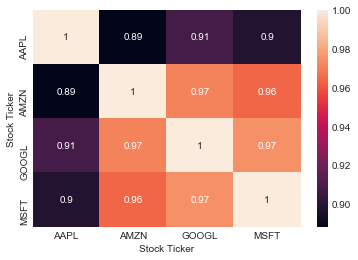

In [149]:
# Correlation between the closing prices of the stocks
sns.heatmap(stocks.xs(key='Close',axis=1,level = 'Stock Info').corr(),annot=True)

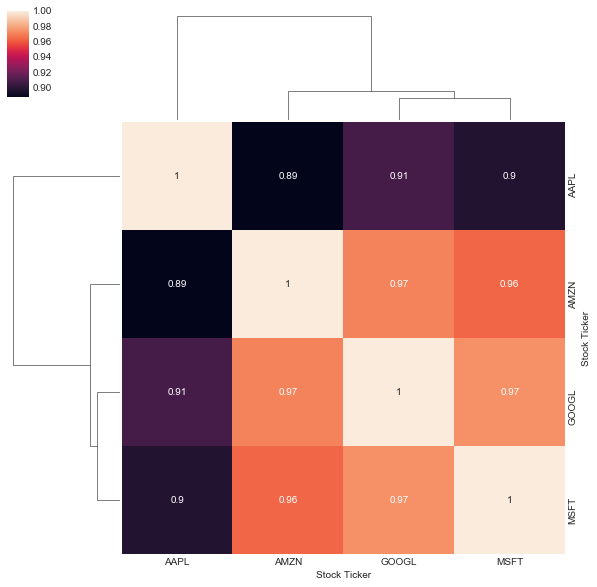

In [150]:
# Clustermap to find what stocks corelate to each other
# From the results of the map, we can see that stocks of Google and Microsoft correlate to each other while Apple
# and Amazon correlate to each other.

sns.clustermap(stocks.xs(key='Close',axis=1,level = 'Stock Info').corr(),annot=True)

In [151]:
# Apple had the lowest and highest return value in the span of 15 days. 
# Using Candle maps to find out how Apple's stock changed over the two months.

In [154]:
aapl0809 = AAPL[['Open','High','Low','Close']].ix['2008-09-01':'2008-11-01']
aapl0809.iplot(kind='candle')

In [158]:
# Amazon had the highest increase in their stock price. Creating a simple moving averages plot

AMZN['Close'].ta_plot(study='sma',periods=[13,21,55])

In [161]:
# Google's stock also increased to a great extent over the course of 10 years
# Creating a Bollinger Band Plot to see how the upper, lower, sma faired with the closing price.
GOOGL['Close'].ta_plot(study='boll')